In [1]:
#function to trnsapose normal (non numpy) array/matrix
def transpose_mat(matrix):
    row_len = len(matrix[0])
    trans_mat = [[row[i] for row in matrix] for i in range(row_len)]
    return trans_mat

In [2]:
#function to display the image properly from column vector matrix
def display_image_from_col(matrix, col):
    k = matrix[:,col].T
    k = k.reshape(500,350)
    img = plt.imshow(k) #show the image
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()

In [3]:
#for changing image sizes to 350 X 500
from PIL import Image
import glob
for images in glob.glob('imageset1/*/*.jpg'): #for all .jpg images in imageset1 folder
    im = Image.open(images)
    nim = im.resize((350,500))
    nim.save(images)
for images in glob.glob('Testset/*.jpg'): #for all .jpg images in Testset folder
    im = Image.open(images)
    nim = im.resize((350,500))
    nim.save(images)

In [4]:
#creating a matrix of column vectors from all images in imageset1
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import glob
plt.rcParams['figure.figsize'] = [4,4] #define size of picture to be displayed

images = []

for image in glob.glob('imageset1/*/*.jpg'): #for all .jpg images in imageset1 folder
    A = imread(image) #import image
    X = np.mean(A,-1); #Convert to greyscale
    XT = np.reshape(X,[X.size,1])
    images.append(XT) #append grey scale images into array
    #img = plt.imshow(XT) #show the image
    #img.set_cmap('gray')
    #plt.axis('off')
    #plt.show()
    
imagesTempArr = np.array(images)
imagesColMat = np.asmatrix(imagesTempArr.T)
print(np.shape(imagesColMat)) #prints dimensions of images Col matrix

(175000, 2340)


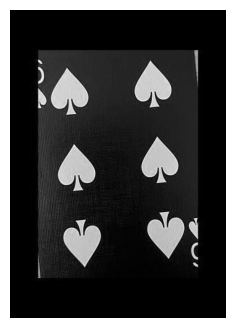

In [5]:
display_image_from_col(imagesColMat,25) #testing diplsay function

Saved SVD values found! Load them now? [y]/n:  y


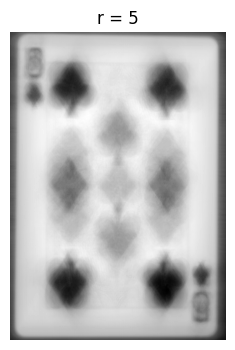

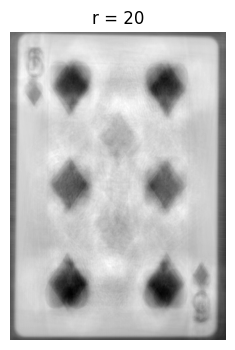

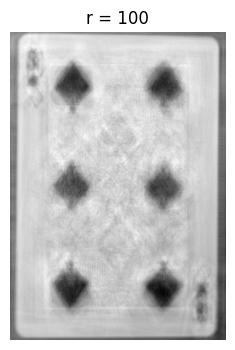

In [15]:
#part not complete
import os, pickle
#trainimages = imagesColMat[:,:np.sum(imagesColMat[:30])]
#avrgcard = np.mean(trainimages,axis=1)
#X = imagesColMat - np.tile(avrgcard,(trainimages.shape[1],1)).T  
def computeSVD():
    if os.path.isfile("svd.pkl"): 
        choice = input("Saved SVD values found! Load them now? [y]/n: ")
        if choice[0].lower() != 'n':
            with open('svd.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
                U, S, VT = pickle.load(f)
            print("SVD Values loaded!")
        else:
            
            U, S, VT = np.linalg.svd(imagesColMat,full_matrices=False) #preform economy SVD on image
            S = np.diag(S) #Define sigma as the diagnals
            choice = input("Do you want to save these new SVD values? [y]/n: ")
            if choice[0].lower() != 'n':
                with open('svd.pkl', 'wb') as f:
                    pickle.dump([U, S, VT], f)
    return U, S, VT

U, S, VT = computeSVD()
def constructApproxImages(x=5, y=20, z=100):
    j = 0
    for r in (x,y,z):
        #construct apporximate image with given eigens(r)
        Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:] #calculate approx by using only a pecified number of defining elements
        plt.figure(j+1)
        j+=1
        plt.title('r = ' + str(r))
        display_image_from_col(Xapprox,1)

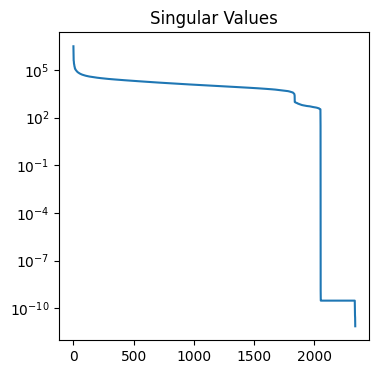

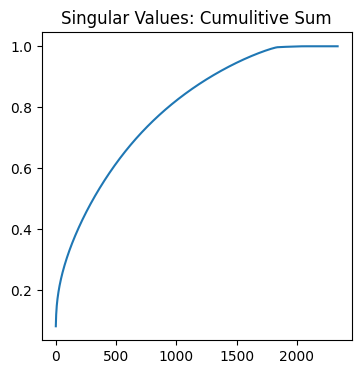

In [7]:
#part not complete

#calculation of important singualr values 
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulitive Sum')
plt.show()